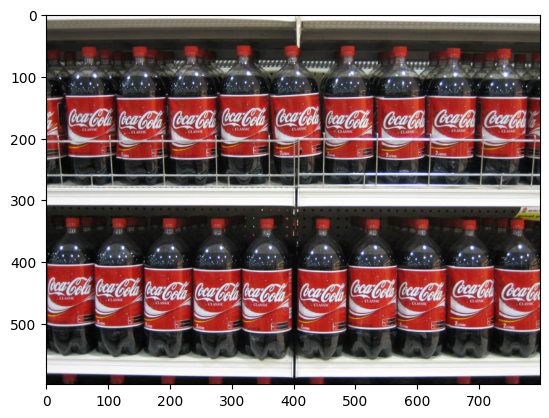

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
coca_multi = cv.cvtColor(cv.imread('images/coca_multi.png'), cv.COLOR_BGR2RGB)
plt.imshow(coca_multi)

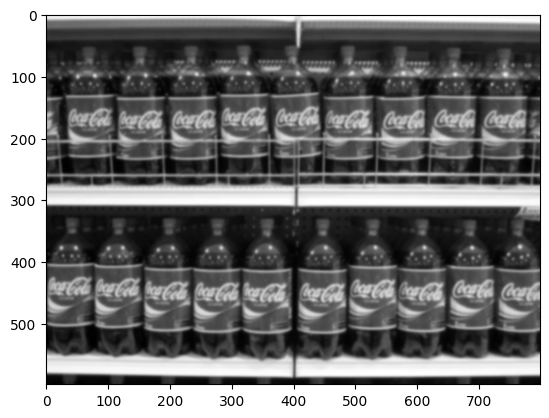

In [17]:
def preprocess(image):
    # recommendeded ratios for canny are: 2:1 and 3:1,
    value = 100
    ratio = 2 
    threshold_1, threshold_2 = value, value*ratio
    # if len(image.shape) == 3:
    grayscale = cv.cvtColor(image, cv.COLOR_RGB2GRAY) if len(image.shape) == 3 else image.copy()
    blurred = cv.GaussianBlur(grayscale, (9, 9), 0)
    canny_edges = cv.Canny(grayscale, threshold_1, threshold_2)
    canny_edges_after_blur = cv.Canny(blurred,threshold_1, threshold_2)
    return grayscale, blurred, canny_edges, canny_edges_after_blur

def preprocess_(image):
    return preprocess(image)[3]

grayscale, blurred, canny_edges, canny_edges_after_blur = preprocess(coca_multi)
plt.imshow(blurred, cmap='gray')

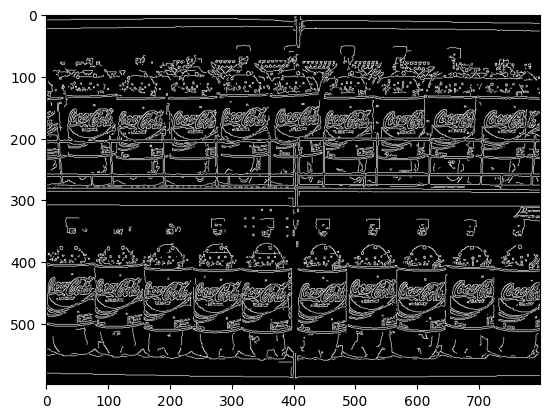

In [3]:
plt.imshow(canny_edges, cmap='gray')

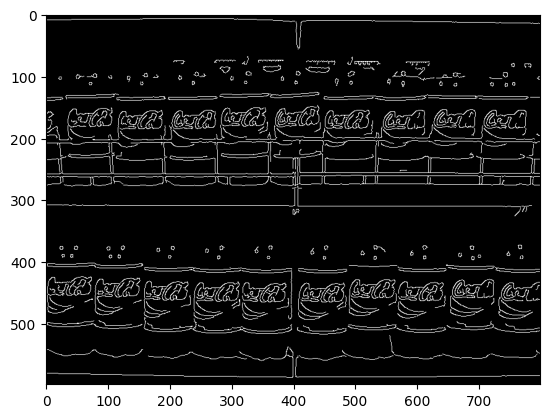

In [4]:
plt.imshow(canny_edges_after_blur, cmap='gray')

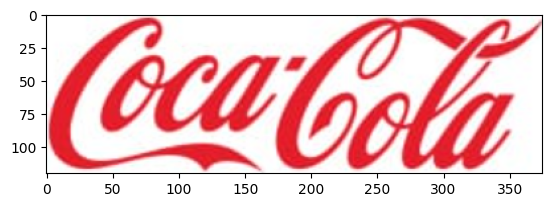

In [50]:
template = cv.cvtColor(cv.imread('template/pattern.png'), cv.COLOR_BGR2RGB)
plt.imshow(template[30:-25, 10:-15])

(array([], dtype=int64), array([], dtype=int64))


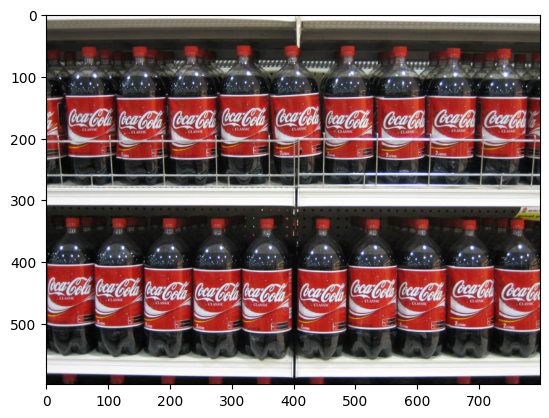

In [11]:
import numpy as np
res = cv.matchTemplate(preprocess_(coca_multi),preprocess_(template),cv.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
# print(len(loc))
modified = coca_multi.copy()
print(loc)
for pt in zip(*loc[::-1]):
    cv.rectangle(modified, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(modified)

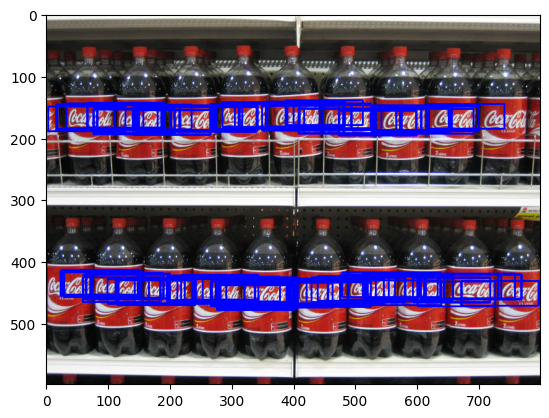

In [63]:
import imutils
def detect_logo(image_rgb, method):
    pre_template = preprocess_(template[30:-25, 10:-15])
    tW, tH = pre_template.shape[::-1]
    modified_image = image_rgb.copy()
    gray = cv.cvtColor(image_rgb, cv.COLOR_RGB2GRAY)
    # scales = np.linspace(0.2,2.0,20) 
    scales = [3]
    
    for scale in scales[::-1]:
        # print(f'iterating: {scale}')
        resized = imutils.resize(gray, width=int(gray.shape[1] * scale))
        r = gray.shape[1] / float(resized.shape[1])
        if tH > resized.shape[0] or tW > resized.shape[1]:
            break

        # Detect edges in the resized, grayscale image and apply template matching
        edged = preprocess_(resized)
        result = cv.matchTemplate(edged, pre_template, method)
        normalized_result = cv.normalize(result, None, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)

        threshold = 0.80
        loc = np.where( normalized_result >= threshold)
        for pt in zip(*loc[::-1]):
            top_left = pt
            startX, startY = int(top_left[0] * r), int(top_left[1] * r)
            endX, endY = int((top_left[0] + tW) * r), int((top_left[1] + tH) * r)
            cv.rectangle(modified_image, (startX, startY), (endX, endY), (0, 0, 255), 2)

    return modified_image

plt.imshow(detect_logo(coca_multi, cv.TM_CCOEFF ))